In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv


In [4]:
train = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
test = pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")
sample_submission = pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")

In [5]:
# Empty fields fulfillment

train.fillna(method = "ffill", inplace = True)
test.fillna(method = "ffill", inplace = True)

# NaN's removement

train = train.dropna()
train = train.reset_index(drop=True)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 
            'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2']

# Max depth variation

rmse_max_depth = []
max_depth_list = []

for max_depth in range(1, 21):
    clf = DecisionTreeClassifier(max_depth = max_depth, max_features = 5, max_leaf_nodes = 5)

    roc_auc_list = []

    kf = KFold(n_splits=5)
    kf.get_n_splits(train)

    for i, (train_index, test_index) in enumerate(kf.split(train)):

        X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
        y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        roc_auc_list.append(roc_auc)
    
    max_depth_list.append(max_depth)
    rmse_max_depth.append(np.mean(roc_auc_list))

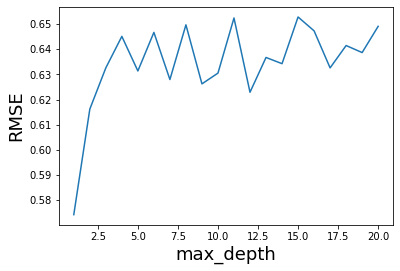

In [48]:
plt.plot(max_depth_list, rmse_max_depth)
plt.ylabel('RMSE', fontsize=18)
plt.xlabel('max_depth', fontsize=18)
plt.show()

In [49]:
# Max features variation

rmse_max_features = []
max_features_list = []

for max_features in range(1, 11):
    clf = DecisionTreeClassifier(max_depth = 5, max_features = max_features, max_leaf_nodes = 5)

    roc_auc_list = []

    kf = KFold(n_splits=5)
    kf.get_n_splits(train)

    for i, (train_index, test_index) in enumerate(kf.split(train)):

        X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
        y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        roc_auc_list.append(roc_auc)
    
    max_features_list.append(max_features)
    rmse_max_features.append(np.mean(roc_auc_list))

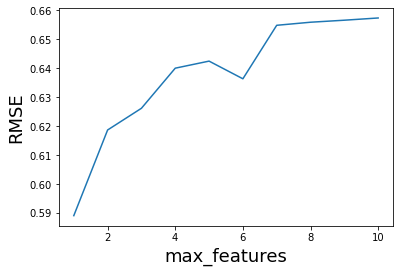

In [50]:
plt.plot(max_features_list, rmse_max_features)
plt.ylabel('RMSE', fontsize=18)
plt.xlabel('max_features', fontsize=18)
plt.show()

In [51]:
# Max leaf nodes variation

rmse_max_leaf_nodes = []
max_leaf_nodes_list = []

for max_leaf_nodes in range(2, 21):
    clf = DecisionTreeClassifier(max_depth = 5, max_features = 5, max_leaf_nodes = max_leaf_nodes)

    roc_auc_list = []

    kf = KFold(n_splits=5)
    kf.get_n_splits(train)

    for i, (train_index, test_index) in enumerate(kf.split(train)):

        X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
        y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        roc_auc_list.append(roc_auc)
    
    max_leaf_nodes_list.append(max_leaf_nodes)
    rmse_max_leaf_nodes.append(np.mean(roc_auc_list))

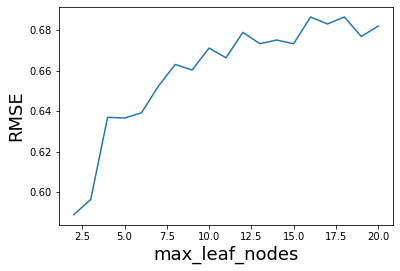

In [52]:
plt.plot(max_leaf_nodes_list, rmse_max_leaf_nodes)
plt.ylabel('RMSE', fontsize=18)
plt.xlabel('max_leaf_nodes', fontsize=18)
plt.show()

In [91]:
# GridSearchCV usage

from sklearn.model_selection import GridSearchCV

params_grid = [
    {"max_depth": np.arange(1, 5)},
    {"max_features": np.arange(1, 5)},
    {"max_leaf_nodes": np.arange(2, 5)},
]

clf = DecisionTreeClassifier()

gs = GridSearchCV(estimator = clf, param_grid = params_grid, scoring = 'roc_auc')
gs.fit(train[features], train["TARGET"])

print(gs.best_params_, gs.best_score_)

{'max_depth': 4} 0.6896194343147684


In [93]:
# RandomizedSearchCV usage

from sklearn.model_selection import RandomizedSearchCV

params_distributions = [
    {"max_depth": np.arange(1, 5)},
    {"max_features": np.arange(1, 5)},
    {"max_leaf_nodes": np.arange(2, 5)},
]

clf = DecisionTreeClassifier()

rs = RandomizedSearchCV(estimator = clf, param_distributions = params_grid, scoring = 'roc_auc')
rs.fit(train[features], train["TARGET"])

print(rs.best_params_, rs.best_score_)

{'max_depth': 4} 0.6896194343147684


In [99]:
# Random forest hyperparameters variation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

features = ['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED', 'FLAG_EMP_PHONE', 
            'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2']

# Max depth variation

rmse_max_depth = []
max_depth_list = []

for max_depth in range(1, 6):
    clf = RandomForestClassifier(max_depth = max_depth, max_features = 5, max_leaf_nodes = 2)

    roc_auc_list = []

    kf = KFold(n_splits=5)
    kf.get_n_splits(train)

    for i, (train_index, test_index) in enumerate(kf.split(train)):

        X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
        y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        roc_auc_list.append(roc_auc)
    
    max_depth_list.append(max_depth)
    rmse_max_depth.append(np.mean(roc_auc_list))

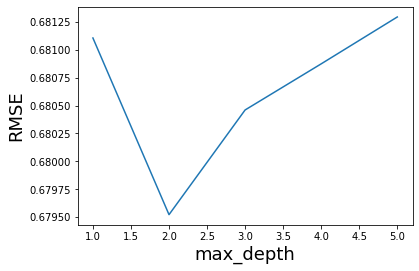

In [100]:
plt.plot(max_depth_list, rmse_max_depth)
plt.ylabel('RMSE', fontsize=18)
plt.xlabel('max_depth', fontsize=18)
plt.show()

In [101]:
# Max features variation

rmse_max_features = []
max_features_list = []

for max_features in range(1, 6):
    clf = RandomForestClassifier(max_depth = 3, max_features = max_features, max_leaf_nodes = 2)

    roc_auc_list = []

    kf = KFold(n_splits=5)
    kf.get_n_splits(train)

    for i, (train_index, test_index) in enumerate(kf.split(train)):

        X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
        y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        roc_auc_list.append(roc_auc)
    
    max_features_list.append(max_features)
    rmse_max_features.append(np.mean(roc_auc_list))

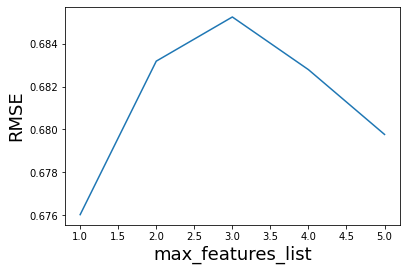

In [102]:
plt.plot(max_features_list, rmse_max_features)
plt.ylabel('RMSE', fontsize=18)
plt.xlabel('max_features_list', fontsize=18)
plt.show()

In [103]:
# Max leaf nodes variation

rmse_max_leaf_nodes = []
max_leaf_nodes_list = []

for max_leaf_nodes in range(2, 6):
    clf = RandomForestClassifier(max_depth = 3, max_features = 5, max_leaf_nodes = max_leaf_nodes)

    roc_auc_list = []

    kf = KFold(n_splits=5)
    kf.get_n_splits(train)

    for i, (train_index, test_index) in enumerate(kf.split(train)):

        X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
        y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        roc_auc_list.append(roc_auc)
    
    max_leaf_nodes_list.append(max_leaf_nodes)
    rmse_max_leaf_nodes.append(np.mean(roc_auc_list))

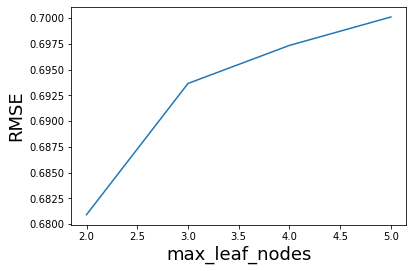

In [104]:
plt.plot(max_leaf_nodes_list, rmse_max_leaf_nodes)
plt.ylabel('RMSE', fontsize=18)
plt.xlabel('max_leaf_nodes', fontsize=18)
plt.show()

In [106]:
# GridSearchCV usage (RandomForestClassifier)

params_grid = [
    {"max_depth": np.arange(1, 3)},
    {"max_features": np.arange(1, 3)},
    {"max_leaf_nodes": np.arange(2, 3)},
]

clf = RandomForestClassifier()

gs = GridSearchCV(estimator = clf, param_grid = params_grid, scoring = 'roc_auc')
gs.fit(train[features], train["TARGET"])

print(gs.best_params_, gs.best_score_)

{'max_depth': 2} 0.6972153983910667


In [109]:
# RandomizedSearchCV usage
import warnings
warnings.filterwarnings(action='ignore')

params_distributions = [
    {"max_depth": np.arange(1, 3)},
    {"max_features": np.arange(1, 3)},
    {"max_leaf_nodes": np.arange(2, 3)},
]

clf = RandomForestClassifier()

rs = RandomizedSearchCV(estimator = clf, param_distributions = params_grid, scoring = 'roc_auc')
rs.fit(train[features], train["TARGET"])

print(rs.best_params_, rs.best_score_)

{'max_depth': 2} 0.6972050050417675


In [124]:
# Categorical features encoding

from sklearn import preprocessing

categorical_fields = []

for col, col_type in dict(train.dtypes).items():
    if col_type == object:
        categorical_fields.append(col)
        
for col in categorical_fields:
    train_encoder = preprocessing.LabelEncoder()
    train[col] = train_encoder.fit_transform(train[col])
    
    test_encoder = preprocessing.LabelEncoder()
    test[col] = test_encoder.fit_transform(test[col].astype(str))

In [126]:
# Feature importance with RandomForestClassifier

all_features = list(train.columns)
all_features.remove("TARGET")

clf = RandomForestClassifier(max_depth = 3, max_leaf_nodes = 2)
clf.fit(train[all_features], train["TARGET"])

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for i in range(10):
    print("%d. feature %s (%f)" % (i + 1, all_features[indices[i]], importances[indices[i]]))

Feature ranking:
1. feature EXT_SOURCE_2 (0.090000)
2. feature DAYS_EMPLOYED (0.080000)
3. feature EXT_SOURCE_3 (0.080000)
4. feature AMT_GOODS_PRICE (0.070000)
5. feature EXT_SOURCE_1 (0.060000)
6. feature DAYS_BIRTH (0.060000)
7. feature NAME_EDUCATION_TYPE (0.060000)
8. feature CODE_GENDER (0.050000)
9. feature REGION_RATING_CLIENT_W_CITY (0.050000)
10. feature DAYS_LAST_PHONE_CHANGE (0.040000)


In [ ]:
# Score on top-10 selected features (M = 10)

top_ten_features = list(np.take(all_features, indices[:10]))

clf = RandomForestClassifier(max_depth = 3, max_features = 10, max_leaf_nodes = 2)

roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

for i, (train_index, test_index) in enumerate(kf.split(train)):

    X_train, X_test = train.loc[train_index, top_ten_features], train.loc[test_index, top_ten_features]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    clf.fit(X_train, y_train)
    predict = clf.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)

print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

In [ ]:
# Score on top-5 features

top_five_features = list(np.take(all_features, indices[:5]))

clf = RandomForestClassifier(max_depth = 3, max_features = 5, max_leaf_nodes = 2)

roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

for i, (train_index, test_index) in enumerate(kf.split(train)):

    X_train, X_test = train.loc[train_index, top_five_features], train.loc[test_index, top_five_features]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    clf.fit(X_train, y_train)
    predict = clf.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)

print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

In [ ]:
# Score on M-1 features except the best one

all_except_best_features = list(np.take(all_features, indices[1:]))

clf = RandomForestClassifier(max_depth = 3, max_features = 9, max_leaf_nodes = 2)

roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

for i, (train_index, test_index) in enumerate(kf.split(train)):

    X_train, X_test = train.loc[train_index, all_except_best_features], train.loc[test_index, all_except_best_features]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    clf.fit(X_train, y_train)
    predict = clf.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)

print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))